# Welcome to Applied Analytical Statistics: Python Lab!

This notebook will introduce the main python packages we will be using in this course:

* `numpy` for numerical calculations
* `scipy` for mathematical algorithms
* `matplotlib` for visualisation
* `pandas` for data wrangling
* `statsmodels` for statistical algorithms

## NumPy

Numpy provides the _array_ data type and a wide range of functions to work with them. This pacakge forms the foundation for most scientific computation done with python. Spending time getting comfortable with using numpy is a wise investment. If you have used vectors in either MATLAB or R the numpy array should feel familiar. You can find resources to help you learn numpy [here](https://numpy.org/learn/).

## Scipy

[Scipy](https://docs.scipy.org/doc/scipy/tutorial/general.html) provides a wide range of mathematical algorithms. For example, there are clustering algorithms, fourier transforms, numerical integration, and optimisation and root-finding algorithms. Scipy makes use of the numpy array.

## Matplotlib

Matplotlib is a general purpose plotting library for python. Visualisation is a key skill of the statistician, learning how to use an established plotting library is another wise investment. You can view a gallery of images made using matplotlib and their associated code [here](https://matplotlib.org/stable/gallery/index.html). There are many plotting libraries out there. Matplotlib is probably the most established plotting library in python so it is a good place to start. If you want to explore alternatives, [seaborn](https://seaborn.pydata.org/index.html) is a wrapper around matplotlib designed for statistical graphics and [altair](https://altair-viz.github.io/) is a more powerful declarative plotting package.

## Pandas

Much of the data we will consider in this course is _tabular_, meaning it can be represented as a table of values. The _dataframe_ is a data structure particularly well suited for working with tabular data. If you have any experience with R you will no doubt be familiar with its `data.frame`s. Pandas is an attempt to bring this functionality to the python ecosystem. Pandas provides some visualisation functionality but it is less flexible than matplotlib.

## Statsmodels

This package provides statistical algorithms. For example, there are functions to fit linear and genealized linear models to data.

# Numpy

To use any package in python we need to import them first, the convention when using numpy is to import it as `np`.

In [1]:
import numpy as np

The `linspace` returns an array of uniformly spaced values.

In [2]:
x = np.linspace(0, 7, 100)

There are lots of things we want to be able to do with arrays: find the minimum and maximum, range of values, and sum of the values for example.

In [3]:
print(x.min())
print(x.max())
# ptp returns the range of values in the array.
print(x.ptp())
print(np.sum(x))

0.0
7.0
7.0
350.00000000000006


There are also a range of statistical functions provided by numpy that are worth knowing about.

In [4]:
print(np.median(x))
print(np.mean(x))
print(np.std(x))
print(np.var(x))

3.5
3.5000000000000004
2.0410352558995437
4.165824915824915


### Challenge

Implement a function to compute the median of an array without using the `median` method. Did it mutate your array? Did you need to make a copy of the array?

_Hint:_ [sort function](https://numpy.org/doc/stable/reference/generated/numpy.sort.html?highlight=sort#numpy.sort), [sort method](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.sort.html?highlight=sort#numpy.ndarray.sort)

### Answer

In [5]:
def my_median(a):
    tmp = np.sort(a)
    n = a.size
    ix = round(np.floor(n/2))
    if n % 2 == 0:
        return (0.5 * (tmp[ix-1] + tmp[ix]))
    else:
        return (tmp[ix])
    
aa = np.array([1])
print((np.median(aa), my_median(aa)), np.median(aa) == my_median(aa))
aa = np.array([2,1])
print((np.median(aa), my_median(aa)), np.median(aa) == my_median(aa))
aa = np.array([2,3,1])
print((np.median(aa), my_median(aa)), np.median(aa) == my_median(aa))
aa = np.array([4,2,3,1])
print((np.median(aa), my_median(aa)), np.median(aa) == my_median(aa))

(1.0, 1) True
(1.5, 1.5) True
(2.0, 2) True
(2.5, 2.5) True


We might also want to count how many values are bigger than some threshold

In [6]:
x[x > 3].size

57

There is a bit going on in this expression: first we construct an array of boolean values with `x > 3`, second we use it to extract just those values from the array for which match the condition with `x[x > 3]`, finally we ask for the size of this array which is stored in the `size` attribute with `x[x > 3].size`.

**WARNING:** There are a couple of ways to index into a numpy array and they have different effects. Understanding how to exploit this is useful but beyond the scope of this course. 

Many of the functions in numpy are vectorised, which means that they apply element-wise to the values in the array. For example, we can evaluate the sine function on each element of the array.

In [7]:
sin_vals = np.sin(x)

# Scipy

Generating random numbers is a common task in statistics. The convention here is to import the statistics submodule as `stats`.

In [8]:
import scipy.stats as stats

There are lots of distributions available; [here is a full list](https://docs.scipy.org/doc/scipy/reference/stats.html#probability-distributions). The lines below return arrays of normal random variables.

In [9]:
norm_rvs = stats.norm.rvs(loc = 0, scale = 1, size = x.size)

The `stats.norm` object has lots of methods though, for example, you can ask for the mean of the distribution and evaluate its probability density function.

In [10]:
stats.norm.mean(loc = 0, scale = 1)

0.0

In [11]:
stats.norm.pdf(x = 1, loc = 0, scale = 1)


0.24197072451914337

### Question

Generate a large number of random variable with a geometric distribution with parameter $p = 1/2$ and confirm that the average of these values is close to the mean of that distribution. 

*Hint:* the [wikipedia page](https://en.wikipedia.org/wiki/Geometric_distribution) for the geometric distribution may be useful with this.

### Answer

Use `stats.geom.rvs(p=0.5, size=10000)` to get the array of values and the `mean` method to compute the mean. You can calculate the mean of this distribution as $1/p$ of use the method which does this `stats.geom.mean(p=0.5)`

### Question

The median and mean are to ways to describe "middle" of a dataset. When would the mean be more useful? When would the median be more useful?

### Answer

Individuals' income provides us examples both ways:

- the mean is more useful when you care about the population as a whole. For example, the mean would be useful if you were trying to estimate the total earnings of people aged $+50$ a random sample.
- the median is more useful if you are trying to understand the bulk of the population excluding outliers. For example, the median would be useful if you were trying to describe the earnings of $90\%$ of voters.

# Matplotlib

We will primarily use the pyplot interface for matplotlib. The convention here is to import this module as `plt`.

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

Below we provide the code for some of the fundemental plots you will need. There is an extensive [gallery](https://matplotlib.org/stable/gallery/index.html) to demonstrate more complex plots. 

## Line plot

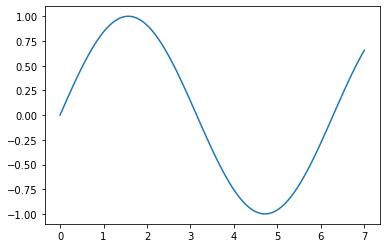

In [13]:
plt.figure()
plt.plot(x, sin_vals)
plt.show()

## Scatter plot

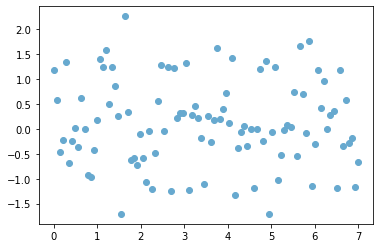

In [14]:
plt.figure()
plt.scatter(x, norm_rvs, color = "#67a9cf")
plt.show()

## Histogram

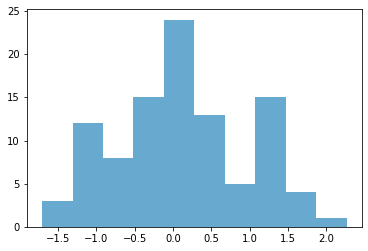

In [15]:
plt.figure()
plt.hist(norm_rvs, bins = 10, color = "#67a9cf")
plt.show()

## Multiple layers

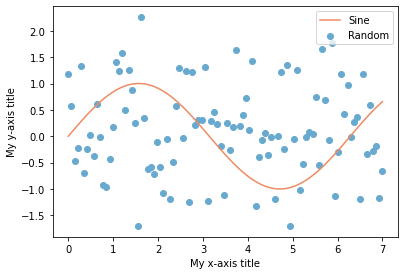

In [16]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(x, sin_vals, color = "#ef8a62", label = "Sine")
ax.scatter(x, norm_rvs, color = "#67a9cf", label = "Random")
ax.legend(loc = "upper right")
ax.set_xlabel("My x-axis title")
ax.set_ylabel("My y-axis title")
plt.show()

## Challenge

Without looking at the answer below, attmpet to create this plot where the histogram is of 1000 exponential random variables, $\lambda = 1.0$, and we have drawn the density of this distribution on top.

<img src="./challenge-figure-hist.png" style="width: 500px;"/>

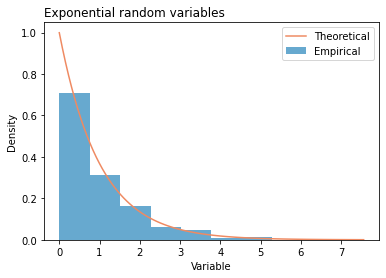

In [17]:
exp_rvs = stats.expon.rvs(scale = 1, size = 1000)
exp_x = np.linspace(exp_rvs.min(), exp_rvs.max(), 100)
exp_y = stats.expon.pdf(x = exp_x, scale = 1)

plt.figure()
plt.hist(exp_rvs, density=True, color = "#67a9cf", label = "Empirical")
plt.plot(exp_x, exp_y, color = "#ef8a62", label = "Theoretical")
plt.legend(loc = "upper right")
plt.xlabel("Variable")
plt.ylabel("Density")
plt.title("Exponential random variables", loc = "left")
plt.show()

## Challenge

Without looking at the answer below, attmpet to create this plot where the number in the title is computed correctly for your random points.

<img src="./challenge-figure-box.png" style="width: 500px;"/>

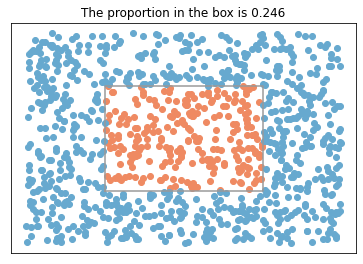

In [18]:
x = np.random.uniform(size = 1000)
y = np.random.uniform(size = 1000)
mask = (0.25 < x) & (x < 0.75) & (0.25 < y) & (y < 0.75)
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot([0.25,0.25,0.75,0.75,0.25], [0.25,0.75,0.75,0.25,0.25], color = "#999999")
ax.scatter(x[mask], y[mask], color = "#ef8a62")
ax.scatter(x[np.logical_not(mask)], y[np.logical_not(mask)], color = "#67a9cf")
ax.set_title('The proportion in the box is {x}'.format(x= mask.sum() / mask.size))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

# Pandas

Pandas provides functions for [reading data from many formats](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html#min-tut-02-read-write). The convention is to import it as `pd`. The `head` method prints the first couple of rows in the dataframe.

In [19]:
import pandas as pd
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The following cell demonstrates how we can use the `query` method to select a subset of the data and then plot it.

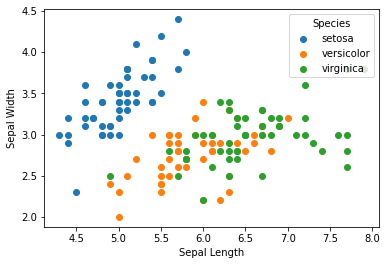

In [20]:
plt.figure()
for species in iris.species.unique():
    tmp = iris.query("species == '{s}'".format(s = species))
    plt.scatter(tmp.sepal_length, tmp.sepal_width, label = species)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title = "Species", loc = "upper right")
plt.show()

Pandas provides many tools to wrangle data. The following example summarises the sepal length of each species. It starts by grouping the data by species, then it extracts the sepal length variable, finally it computes the mean and standard deviation of these values

In [21]:
iris_summary = iris.groupby("species")[["sepal_length"]].agg({"sepal_length": ["std", "mean"]})
print(iris_summary)

           sepal_length       
                    std   mean
species                       
setosa         0.352490  5.006
versicolor     0.516171  5.936
virginica      0.635880  6.588


This data can then be represented as a bar chart with error bars to indicate two standard deviations about the mean. This is a popular way to visualise this sort of data. It is not the optimal way to represent this data, can you think of a better way? Why do you think we have used two standard deviations in the error bars?

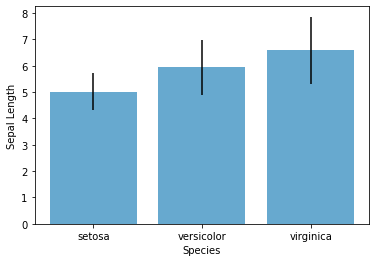

In [22]:
plt.figure()
plt.bar(iris_summary.index, 
        iris_summary.sepal_length["mean"], 
        yerr=2*iris_summary.sepal_length["std"],
        color = "#67a9cf")
plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.show()

### Challenge

Find a better (in your opinion) way to display these data and explain why you think it is better.

### Answer

Here is a subjective list:

1. _swarm plot_
2. _jittered scatter plot_
3. _box plot_
4. _violin plot_

Plots that display the data in a clean way with minimal loss of information are preferable.

### Question

What do you notice about the correlation between the sepal length and width? Is there a positive or negative correlation?

* _Hint 1_ [hmmm](https://en.wikipedia.org/wiki/Simpson%27s_paradox)
* _Hint 2_ [it should only take two lines of code](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.corr.html?highlight=corr#) 


### Answer

This is a classic example of Simpson's paradox. If you just look at the correlation without considering that they are drawn from different species, you will get a surprising answer. If you look at the correlations after grouping the data by species you get a far more reasonable result.

The two lines of code to see this are shown below.


In [23]:
iris.filter(items = ["sepal_length", "sepal_width", "species"]).corr()

,sepal_length,sepal_width
sepal_length,1.00000,-0.11757
sepal_width,-0.11757,1.00000


In [24]:
iris.groupby("species")[["sepal_length", "sepal_width"]].corr()

sepal_length  sepal_width
species                                           
setosa     sepal_length      1.000000     0.742547
           sepal_width       0.742547     1.000000
versicolor sepal_length      1.000000     0.525911
           sepal_width       0.525911     1.000000
virginica  sepal_length      1.000000     0.457228
           sepal_width       0.457228     1.000000

# Statsmodels

We will cover this in subsequent tutorials...